In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('cars_data.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df = df.rename(columns=str.capitalize)

In [5]:
df.head()

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.shape

(4340, 8)

In [7]:
df.describe()

,Year,Selling_price,Km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.isnull().sum()

Name             0
Year             0
Selling_price    0
Km_driven        0
Fuel             0
Seller_type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_price  4340 non-null   int64 
 3   Km_driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
# checking the distribution of categorical data

print(df.Fuel.value_counts())
print(df.Seller_type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_type, dtype: int64
Manual       3892
Automatic     448
Name: Transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64


Encoding the categorical data

In [12]:
# Encoding "Fuel" Column
df.replace({'Fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# Encoding "Seller_Type" Column
df.replace({'Seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# Encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# Encoding "Owner" Column
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [13]:
df.head()

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [14]:
df['Name']=df['Name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [15]:
df.head()

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6,2012,600000,100000,1,1,0,0
3,Datsun RediGO T,2017,250000,46000,0,1,0,0
4,Honda Amaze VX,2014,450000,141000,1,1,0,1


In [16]:
backup=df.copy()

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arbab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arbab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arbab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arbab\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points

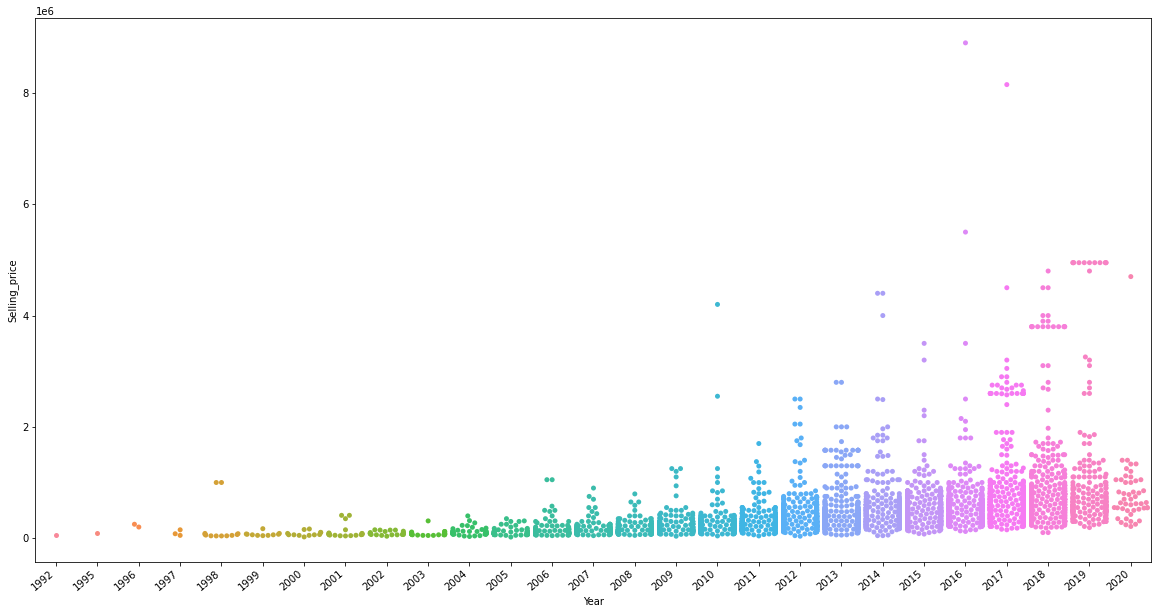

In [17]:
# Checking Relationship of year with selling price
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

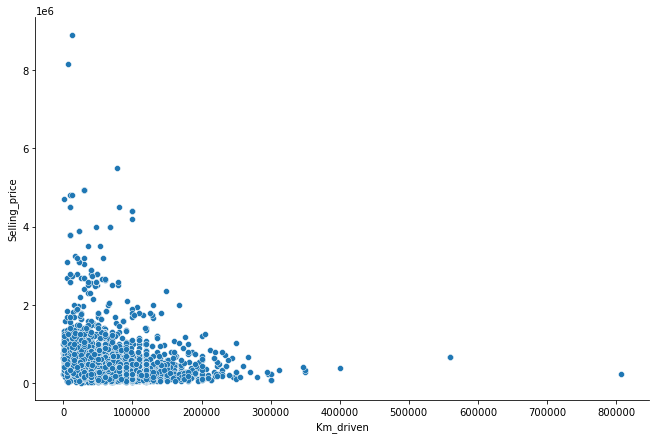

In [18]:
# Checking relationship of km with selling price
sns.relplot(x='Km_driven',y='Selling_price',data=df,height=6,aspect=1.5)

<AxesSubplot:xlabel='Fuel', ylabel='Selling_price'>

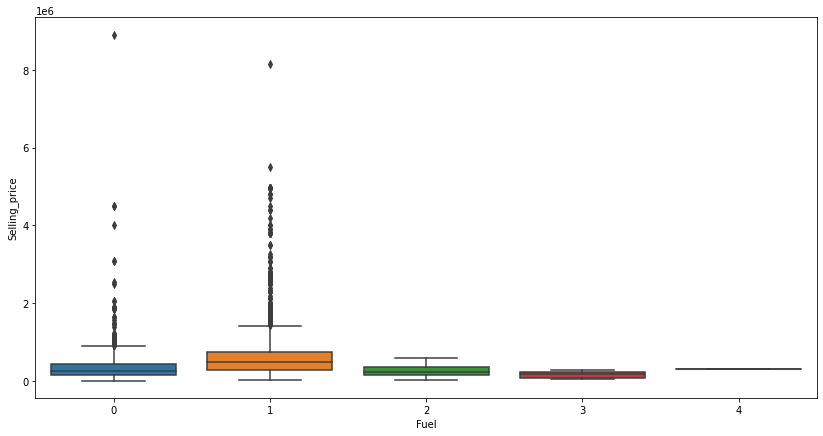

In [19]:
# Checking relationship of fuel type with selling price
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel',y='Selling_price',data=df)

Splitting the data & target

In [20]:
X = df.drop(['Name','Selling_price'],axis=1)
Y = df['Selling_price']

In [21]:
print(X)

      Year  Km_driven  Fuel  Seller_type  Transmission  Owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [22]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_price, Length: 4340, dtype: int64


Splitting Training and Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training using Linear Regression & Lasso Regression

In [24]:
# loading the linear regression model

lin_reg_model = LinearRegression()

In [25]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [27]:
# R-Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R-Squared Error : ", error_score)

R-Squared Error :  0.4276361285018673


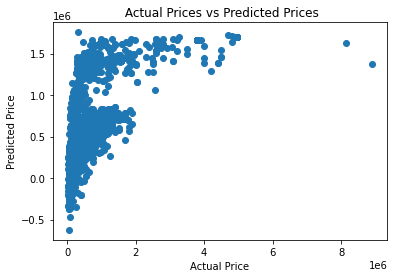

In [28]:
# Visualize actual price and predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [29]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [30]:
# R2 Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Error : ", error_score)

R2 Error :  0.5027999353753416


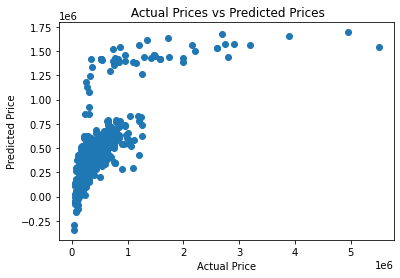

In [31]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [32]:
# Lasso Regression

# loading the linear regression model
lass_reg_model = Lasso()

In [33]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [34]:
# Model Evaluation

# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [35]:
# R2 Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R2 : ", error_score)

R2 :  0.4276361284468665


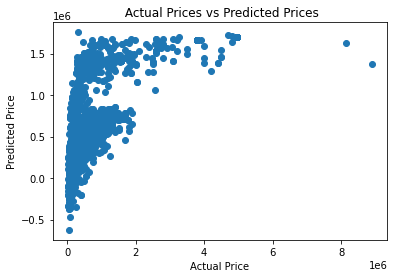

In [36]:
# Visualize actual price and predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [38]:
# R2 Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Error : ", error_score)

R2 Error :  0.5027994839428189


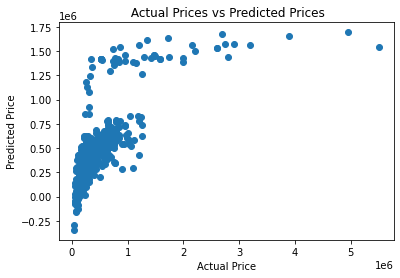

In [39]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [40]:
# X=df.drop(['Name','Selling_price'],axis=1)
# Y=df['Selling_price']

In [41]:
# print(X)

In [42]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import r2_score

In [43]:
# Creating an OneHotEncoder object to contain all the possible categories

# ohe=OneHotEncoder()
# ohe.fit(X[['Transmission','Seller_type','Fuel','Owner']])

In [44]:
# Creating a column transformer to transform categorical columns

# column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Transmission','Seller_type','Fuel','Owner']),remainder='passthrough')

In [45]:
# lr=LinearRegression()

In [46]:
# Making a pipeline

# pipe=make_pipeline(column_trans,lr)

In [47]:
# Model Fitting
# pipe.fit(X_train,Y_train)

In [48]:
# Y_pred=pipe.predict(X_test)

In [49]:
#  Checking R2 Score
# r2_score(Y_test,Y_pred)

In [50]:
#  Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

# scores=[]
# for i in range(434):
#     X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
#     lr=LinearRegression()
#     pipe=make_pipeline(column_trans,lr)
#     pipe.fit(X_train,Y_train)
#     y_pred=pipe.predict(X_test)
#     scores.append(r2_score(Y_test,Y_pred))